# 시계열 회귀분석_공기압축기

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import statsmodels.api as sm

In [2]:
import matplotlib.font_manager as fm 

font_fname = 'C:/Windows/Fonts/Malgun.ttf' #적용할 폰트
font_family = fm.FontProperties(fname=font_fname).get_name() #폰트 설정
plt.rcParams["font.family"] = font_family  #폰트 적용

In [3]:
os.chdir(r"C:\Users\user\Desktop\산공 빅데이터 경진대회")

In [4]:
raw_data = pd.read_csv("KBV공작_concat.csv")

In [5]:
comp_1_one = raw_data.drop(columns=['Unnamed: 0'], axis=1)

In [6]:
comp_1_one['NEWTIME'] = pd.to_datetime(comp_1_one['TIME'])
comp_1_one.drop('TIME', axis = 1, inplace=True)
comp_1_one.set_index('NEWTIME', inplace=True)

# train test 분할

In [7]:
X = comp_1_one
X_train = comp_1_one[:43135]
X_test = comp_1_one[43135:]
X_train = X_train[['전류평균', '온도', '선간전압평균', '누적전력량', '역률평균', '주파수', '전압고조파평균']]
X_test = X_test[['전류평균', '온도', '선간전압평균', '누적전력량', '역률평균', '주파수', '전압고조파평균']]

<AxesSubplot:>

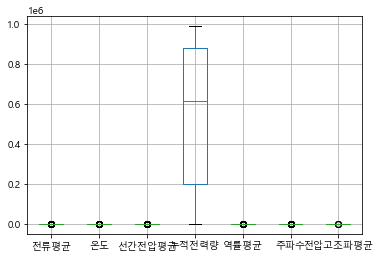

In [8]:
X_train.boxplot()

# 표준화

In [9]:
from sklearn import preprocessing

# preprocessing.MinMaxScaler()
# preprocessing.StandardScaler()
# preprocessing.RobustScaler()
# preprocessing.Normalizer()

# 1. 스케일러를 선택 후 스케일러 객체를 지정한다
scaler = preprocessing.StandardScaler()

# 2. 스케일러 객체의 fit()함수를 이용하여 필요한 파라미터를 저장한다
# scaler_fit에는 칼럼별 최대와 최소값이 저장되어있다.
scaler_fit = scaler.fit(X)

# 3. 스케일러 객체의 transform()함수를 이용하여 스케일링을 수행한다
result=scaler_fit.transform(X)

In [10]:
def feature_engineering_scaling(scaler, X_train, X_test):
    # scaler파라미터는 아래 4개중 하나를 넣는다
    # preprocessing.MinMaxScaler()
    # preprocessing.StandardScaler()
    # preprocessing.RobustScaler()
    # preprocessing.Normalizer()
    scaler = scaler
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                               index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                               index=X_test.index, columns=X_test.columns)
    return X_train_scaling, X_test_scaling

In [11]:
X_train_scaling, X_test_scaling = feature_engineering_scaling(scaler, X_train, X_test)

In [12]:
X_train_scaling

,전류평균,온도,선간전압평균,누적전력량,역률평균,주파수,전압고조파평균
NEWTIME,,,,,,,
2020-09-16 00:00:00,1.044311,0.883046,1.243852,0.287596,-1.712188,0.978694,1.534257
2020-09-16 00:01:00,1.040028,0.718091,0.718222,0.287690,-1.691317,0.360868,1.558474
2020-09-16 00:02:00,1.050635,0.718091,0.718222,0.287783,-1.712188,0.068214,1.486556
2020-09-16 00:03:00,1.029420,0.718091,1.046839,0.287877,-1.705231,-1.460091,1.319237
2020-09-16 00:04:00,1.042068,0.883046,0.980643,0.287971,-1.705231,-0.256957,1.343455
...,...,...,...,...,...,...,...
2020-10-15 22:50:00,1.943085,-1.591286,-0.989484,-0.199647,-0.821677,-0.256957,0.602996
2020-10-15 22:51:00,6.090786,-1.591286,0.258789,-0.199437,-2.011345,-1.460091,0.961117
2020-10-15 22:52:00,0.804013,-1.591286,-1.383509,-0.199354,-1.586960,-1.167436,0.889199


In [13]:
X_test_scaling

,전류평균,온도,선간전압평균,누적전력량,역률평균,주파수,전압고조파평균
NEWTIME,,,,,,,
2020-10-15 22:55:00,1.488395,-1.591286,-1.251905,-0.199058,-0.884291,-0.842265,0.841499
2020-10-15 22:56:00,1.509609,-1.756241,-1.317313,-0.198945,-0.793848,-1.167436,0.698397
2020-10-15 22:57:00,1.509609,-1.591286,-1.448917,-0.198842,-0.543392,-0.842265,0.674180
2020-10-15 22:58:00,1.201383,-1.591286,-0.989484,-0.198723,-1.246061,-0.842265,0.674180
2020-10-15 22:59:00,0.793405,-1.756241,-1.514326,-0.198618,-1.628703,-1.167436,0.793798
...,...,...,...,...,...,...,...
2020-10-27 23:55:19,2.782362,-1.756241,0.652555,-0.679314,-0.992349,-1.153454,2.824279
2020-10-27 23:56:19,2.935354,-1.591286,1.309260,-0.679106,-0.976007,-1.153942,2.848168
2020-10-27 23:57:19,2.746239,-1.591286,1.440606,-0.678900,-1.095683,-0.547335,2.537618


# VIF 확인

처음에 다 넣고 유효전력, 무효전력, 상전압 제거한 과정 보여주기

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
# correlation from features
X_train_scaling.corr().style.background_gradient().set_precision(2).set_properties(**{'font-size': '11pt'})

,전류평균,온도,선간전압평균,누적전력량,역률평균,주파수,전압고조파평균
전류평균,1.00,-0.23,-0.18,-0.10,-0.75,-0.16,0.46
온도,-0.23,1.00,-0.08,0.12,0.28,0.51,-0.41
선간전압평균,-0.18,-0.08,1.00,0.16,0.06,0.02,0.15
누적전력량,-0.10,0.12,0.16,1.00,0.13,0.04,0.07
역률평균,-0.75,0.28,0.06,0.13,1.00,0.19,-0.52
주파수,-0.16,0.51,0.02,0.04,0.19,1.00,-0.24
전압고조파평균,0.46,-0.41,0.15,0.07,-0.52,-0.24,1.00


In [40]:
# extract effective features using variance inflation factor
vif = pd.DataFrame()

# variance_inflation_factor(X, i) : Xi를 x나머지로 회귀분석한 후 VIF값을 구한것. 즉 xi의 vif값. 즉 이값이 높을수록 종속성이 높다는 뜻

vif['VIF_Factor'] = [variance_inflation_factor(X_train_scaling.values, i) 
                     for i in range(X_train_scaling.shape[1])]
vif['Feature'] = X_train_scaling.columns
vif.sort_values(by='VIF_Factor', ascending=True)

,VIF_Factor,Feature
3,1.092056,누적전력량
2,1.136703,선간전압평균
5,1.365598,주파수
1,1.588384,온도
6,1.687198,전압고조파평균
0,2.436196,전류평균
4,2.567560,역률평균


# 정상성 확인 시각화

In [41]:
from statsmodels import datasets
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [42]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

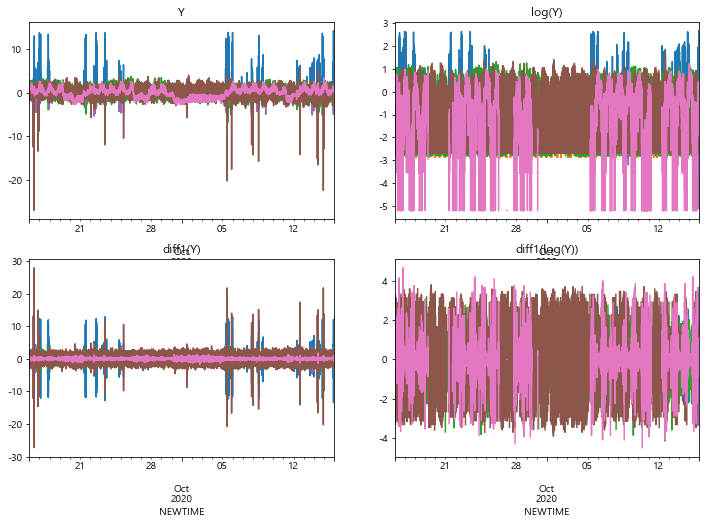

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%reload_ext autoreload
%autoreload 2
#from module import stationarity_adf_test, stationarity_kpss_test

raw = X_train_scaling

## 정상성 확보
plt.figure(figsize=(12,8))
raw.plot(ax=plt.subplot(221), title='Y', legend=False) ## 그냥 원데이터
np.log(raw).plot(ax=plt.subplot(222), title='log(Y)', legend=False) ## 원데이터에 로그 취함
raw.diff(1).plot(ax=plt.subplot(223), title='diff1(Y)', legend=False) ## 원데이터에 차분 
np.log(raw).diff(1).plot(ax=plt.subplot(224), title='diff1(log(Y))', legend=False) ## 원데이터에 로그취한 걸 차분
plt.show()

In [44]:
raw0=raw.iloc[:,0]
raw1=raw.iloc[:,1]
raw2=raw.iloc[:,1]
raw3=raw.iloc[:,3]
raw_list = [raw0,raw1,raw2,raw3]

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


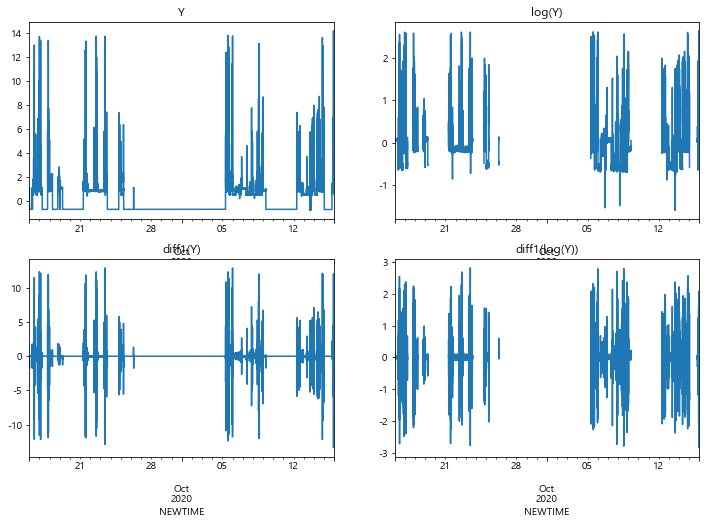

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


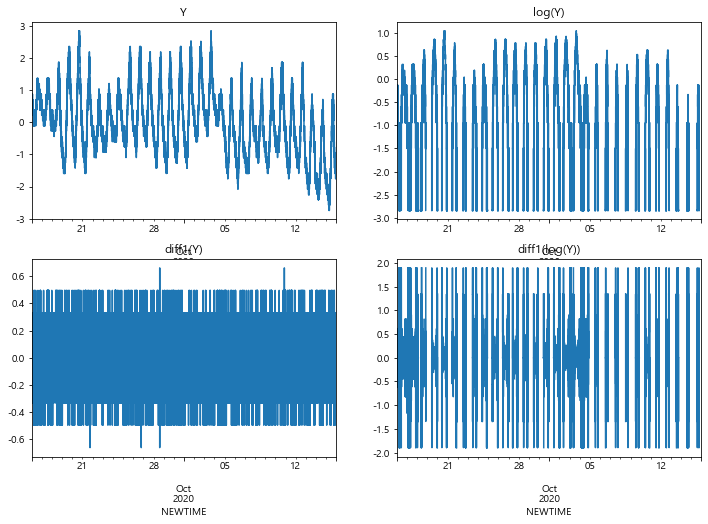

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


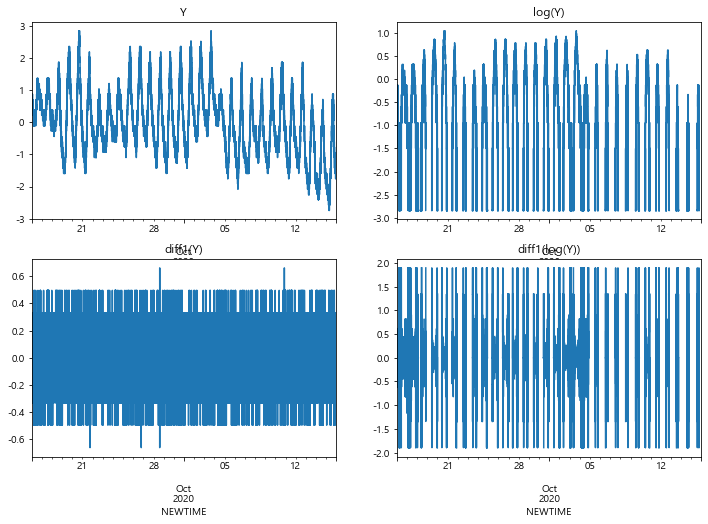

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


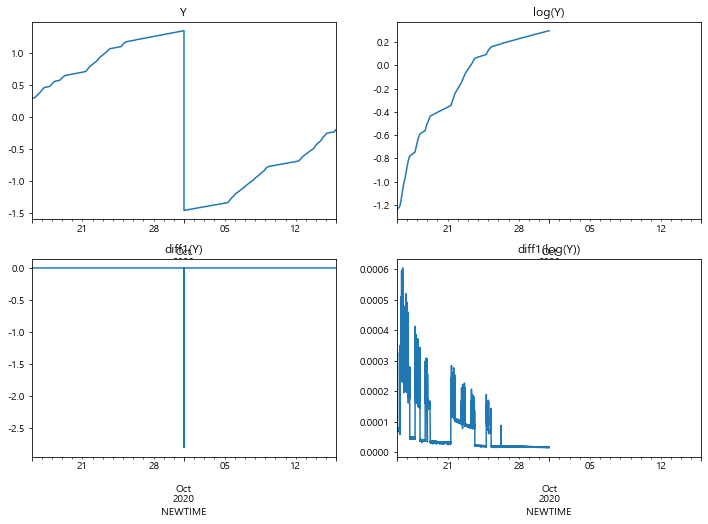

In [45]:
for raw in raw_list:
    plt.figure(figsize=(12,8))
    raw.plot(ax=plt.subplot(221), title='Y', legend=False)
    np.log(raw).plot(ax=plt.subplot(222), title='log(Y)', legend=False)
    raw.diff(1).plot(ax=plt.subplot(223), title='diff1(Y)', legend=False)
    np.log(raw).diff(1).plot(ax=plt.subplot(224), title='diff1(log(Y))', legend=False)
    plt.show()

# 정상화 및 정상성 테스트(ADF, KPSS)

In [107]:
! pip install module

In [46]:
#비정상성을 없애기 위해선 추세, 계절성을 없애야 함
#ADF는 추세가 제거 되었는지 확인하는데 유용하고, KPSS는 계절성 제거가 되었는지 확인하는데 유용

import pandas as pd
from statsmodels import datasets
import matplotlib.pyplot as plt
import statsmodels.api as sm
%reload_ext autoreload
%autoreload 2
#import module
#from module import *
#from module import stationarity_adf_test, stationarity_kpss_test

X = comp_1_one
X=X.reset_index()
X_train = X[:43135]
X_test = X[43135:]

In [80]:
X_train = X_train[['NEWTIME','전류평균', '온도', '선간전압평균', '누적전력량', '역률평균', '주파수', '전압고조파평균']]
X_test = X_test[['NEWTIME','전류평균', '온도', '선간전압평균', '누적전력량', '역률평균', '주파수', '전압고조파평균']]

KeyError: "['NEWTIME'] not in index"

In [87]:
## ADF 검증 (누적전력량만 불안정)
#시계열이 안정적인지 여부를 확인하는데 이용하는 방법

### ADF 검정(Augmented Dickey-Fuller test) / 단위근 검정 으로 정상성 확인
# H0(귀무가설) : 자료에 단위근이 존재한다. 즉, 정상성을 만족하지 않는다.
# H1(대립가설) : 자료가 정상성을 만족한다.

from statsmodels.tsa.stattools import adfuller

def adf_test(df):
    result=adfuller(df.values)
    print('ADF Statistic : %f ' % result[0])
    print('p-value : %f' % result[1])
    print('Critical Values:')

    for key,value in result[4].items():
        print('\t%s : %.3f' % (key,value))
        
for col in X_train.columns[1:]:
    print(col)
    adf_test(X_train_scaling[col])

온도
ADF Statistic : -8.400364 
p-value : 0.000000
Critical Values:
	1% : -3.431
	5% : -2.862
	10% : -2.567
선간전압평균
ADF Statistic : -17.301980 
p-value : 0.000000
Critical Values:
	1% : -3.431
	5% : -2.862
	10% : -2.567
누적전력량
ADF Statistic : -1.412320 
p-value : 0.576356
Critical Values:
	1% : -3.431
	5% : -2.862
	10% : -2.567
역률평균
ADF Statistic : -4.902203 
p-value : 0.000035
Critical Values:
	1% : -3.431
	5% : -2.862
	10% : -2.567
주파수
ADF Statistic : -8.404670 
p-value : 0.000000
Critical Values:
	1% : -3.431
	5% : -2.862
	10% : -2.567
전압고조파평균
ADF Statistic : -5.478912 
p-value : 0.000002
Critical Values:
	1% : -3.431
	5% : -2.862
	10% : -2.567


In [88]:
import warnings
warnings.filterwarnings('ignore')

## KPSS 검증
#시계열이 평균 또는 선형 추세 주변에 고정되어 있는지 또는 단위 루트로 인해 고정되지 않은지 확인
# 귀무가설 : 시계열이 안정적
# 대립가설 : 시계열이 안정적이지 않음 (adf와 반대)

## 모두 0.05보다 작으므로 귀무가설 기각 -> 시계열이 안정적이지 않음......

from statsmodels.tsa.stattools import kpss

def kpss_test(df):
    statistic,p_value,n_lags,critical_values=kpss(df.values)
    
    print(f'KPSS Statistic : {statistic}')
    print(f'p-vluae : {p_value}')
    print(f'num_lags : {n_lags}')
    print('Critical Values : ')
    
    for key, value in critical_values.items():
        print(f' {key} : {value}')
        
for col in X_train.columns[1:]:
    print(col)
    kpss_test(X_train_scaling[col])

온도
KPSS Statistic : 9.19252603210692
p-vluae : 0.01
num_lags : 55
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
선간전압평균
KPSS Statistic : 1.7923774217113162
p-vluae : 0.01
num_lags : 55
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
누적전력량
KPSS Statistic : 40.83007725384153
p-vluae : 0.01
num_lags : 55
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
역률평균
KPSS Statistic : 4.563815000957166
p-vluae : 0.01
num_lags : 55
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
주파수
KPSS Statistic : 6.803937212179208
p-vluae : 0.01
num_lags : 55
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
전압고조파평균
KPSS Statistic : 4.730970094861779
p-vluae : 0.01
num_lags : 55
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


ADF 테스트와 KPSS 테스트를 모두 사용하여 시계열의 안정성에 대해 교차 확인  
-> ADF 결과와 KPSS 결과가 맞지 않음... 확인 필요...

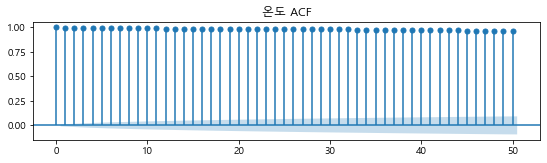

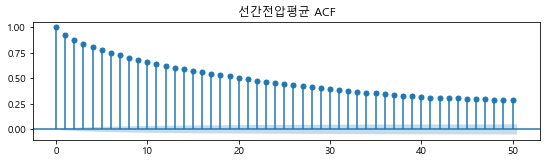

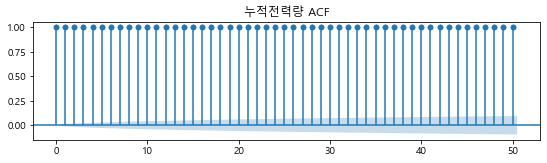

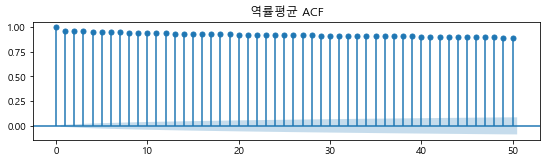

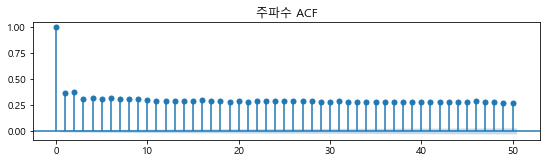

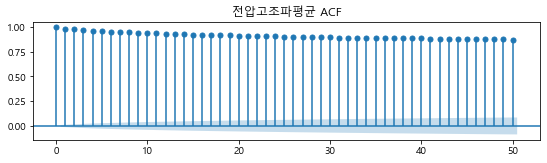

In [89]:
## 정상성을 만족하는 데이터도 ACF와 PACF 그래프를 그려 ARIMA 모형의 p와 q를 결정

import statsmodels.api as sm

for i in X_train.columns[1:]:
    j=1
    fig=plt.figure(figsize=(20,10))
    ax=fig.add_subplot(4,2,j)
    fig=sm.graphics.tsa.plot_acf(X_train_scaling[i],lags=50, ax=ax, use_vlines=True, title='{} ACF'.format(i)) #자기상관계수
    j+=1
    
## ACF값이 아주 천천히 감소하는 것은 정상성을 만족하지 않는다는 것을 의미

#### 추세제거 및 정상성 확인

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   역률평균   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                 1.127e+04
Date:                Sat, 11 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:33:24   Log-Likelihood:                -40869.
No. Observations:               43135   AIC:                         8.175e+04
Df Residuals:                   43128   BIC:                         8.181e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.578e-15      0.003  -5.25e-13      1.000      -0.006       0.006
전압고조파평균       -0.2186      0.004    -58.152      0.000      -0.226      -0.211
전류평균          -0.6390      0.004   -180.511      0.000      -0.646      -0.632
온도             0.0248      0.004      6.558      0.000       0.017       0.032
선간전압평균        -0.0370      0.003    -11.582      0.000      -0.043      -0.031
누적전력량          0.0836      0.003     26.857      0.000       0.078       0.090
주파수            0.0145      0.004      4.122      0.000       0.008       0.021
==============================================================================
Omnibus:                    25356.248   Durbin-Watson:                   0.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1424085.417
Skew:                           2.105   Prob(JB):                         0.00
Kurtosis:                      30.832   Cond. No.                         2.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

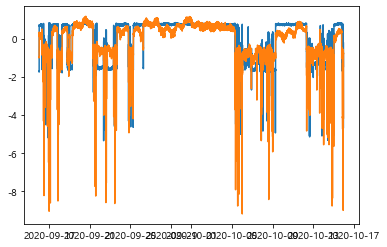

In [95]:
#c(month):더미화, -1:절편제거
result = sm.OLS.from_formula(formula='역률평균 ~ 전압고조파평균+전류평균+온도+선간전압평균+누적전력량+주파수', data=X_train_scaling).fit() 
display(result.summary())

plt.plot(X_train_scaling.index, X_train_scaling.역률평균, X_train_scaling.index, result.fittedvalues)
plt.show()

In [96]:
## ADF 검증
adf_test(result.fittedvalues)

ADF Statistic : -5.049284 
p-value : 0.000018
Critical Values:
	1% : -3.431
	5% : -2.862
	10% : -2.567


In [97]:
## KPSS 검증
kpss_test(result.fittedvalues)

KPSS Statistic : 7.091105775256164
p-vluae : 0.01
num_lags : 55
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


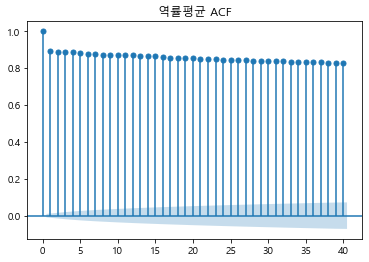

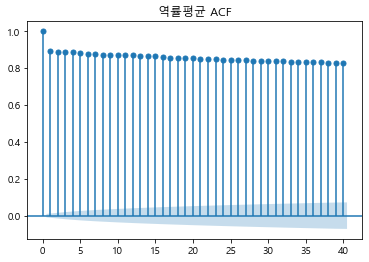

In [98]:
sm.graphics.tsa.plot_acf(result.fittedvalues,lags=40, use_vlines=True, title='역률평균 ACF') #자기상관계수

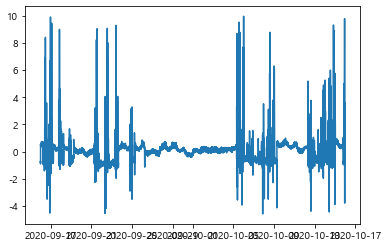

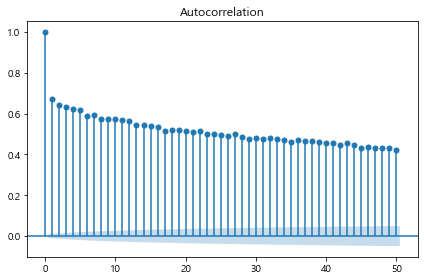

In [99]:
# 추세 제거 및 정상성 확인 (전압고조파평균)
## 방법1
plt.plot(X_train_scaling.index, result.resid)
plt.show()

sm.graphics.tsa.plot_acf(result.resid, lags=50, use_vlines=True)
plt.tight_layout()
plt.show()

In [100]:
## ADF 검증
adf_test(result.resid)

ADF Statistic : -11.605338 
p-value : 0.000000
Critical Values:
	1% : -3.431
	5% : -2.862
	10% : -2.567


In [101]:
## KPSS 검증
kpss_test(result.resid)

KPSS Statistic : 0.9014307047153135
p-vluae : 0.01
num_lags : 55
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


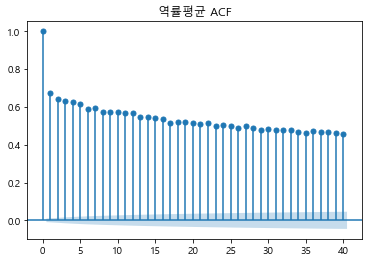

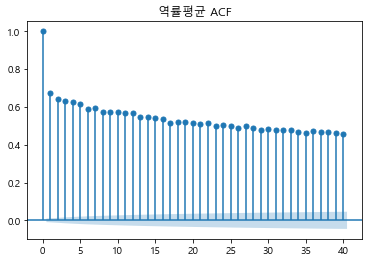

In [102]:
sm.graphics.tsa.plot_acf(result.resid,lags=40, use_vlines=True, title='역률평균 ACF') #자기상관계수

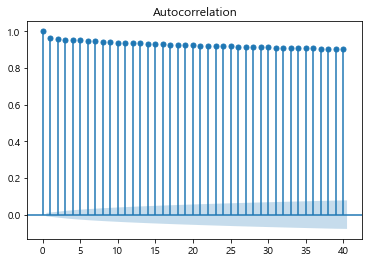

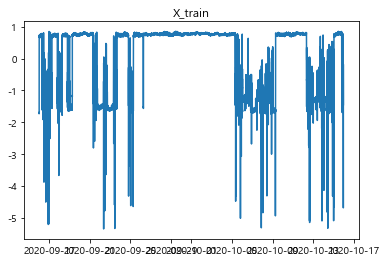

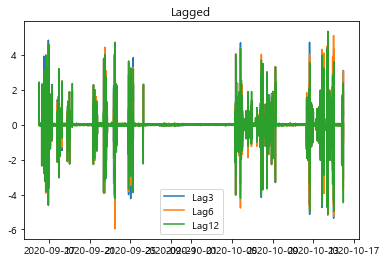

In [103]:
# 계절성 제거 및 정상성 확인
## 방법2
sm.graphics.tsa.plot_acf(X_train_scaling.역률평균, lags=40, use_vlines=True)
plt.show()

plt.plot(X_train_scaling.index, X_train_scaling.역률평균)
plt.title('X_train')
plt.show()
seasonal_lag = 3
plt.plot(X_train_scaling.index[seasonal_lag:], X_train_scaling.역률평균.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
seasonal_lag = 6
plt.plot(X_train_scaling.index[seasonal_lag:], X_train_scaling.역률평균.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
seasonal_lag = 12
plt.plot(X_train_scaling.index[seasonal_lag:], X_train_scaling.역률평균.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
plt.title('Lagged')
plt.legend()
plt.show()

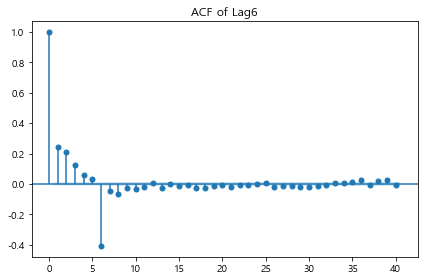

In [104]:
seasonal_lag = 6

sm.graphics.tsa.plot_acf(X_train_scaling.역률평균.diff(seasonal_lag).dropna(), lags=40, 
                         use_vlines=True, title='ACF of Lag{}'.format(seasonal_lag))
plt.tight_layout()
plt.show()

In [105]:
## ADF 검증
adf_test(X_train_scaling.역률평균.diff(seasonal_lag).dropna())

ADF Statistic : -31.565303 
p-value : 0.000000
Critical Values:
	1% : -3.431
	5% : -2.862
	10% : -2.567


In [106]:
## KPSS 검증
kpss_test(X_train_scaling.역률평균.diff(seasonal_lag).dropna())

KPSS Statistic : 0.028257047357661744
p-vluae : 0.1
num_lags : 55
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


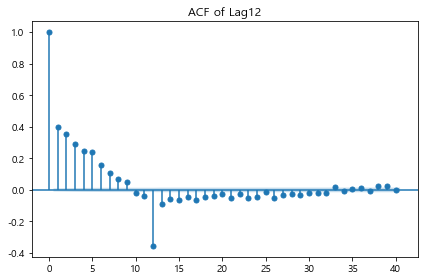

In [107]:
seasonal_lag = 12
sm.graphics.tsa.plot_acf(X_train_scaling.역률평균.diff(seasonal_lag).dropna(), lags=40, 
                         use_vlines=True, title='ACF of Lag{}'.format(seasonal_lag))
plt.tight_layout()
plt.show()

In [108]:
## ADF 검증
adf_test(X_train_scaling.역률평균.diff(seasonal_lag).dropna())

ADF Statistic : -30.511516 
p-value : 0.000000
Critical Values:
	1% : -3.431
	5% : -2.862
	10% : -2.567


In [109]:
## KPSS 검증
kpss_test(X_train_scaling.역률평균.diff(seasonal_lag).dropna())

KPSS Statistic : 0.03221853823671032
p-vluae : 0.1
num_lags : 55
Critical Values : 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


#### 계절성 제거 train셋

change_value_dict = {0 :0.01}
X_train_scaling = X_train_scaling.replace({'전류평균':change_value_dict})
X_train_scaling = X_train_scaling.replace({'온도':change_value_dict})
X_train_scaling = X_train_scaling.replace({'선간전압평균':change_value_dict})
X_train_scaling = X_train_scaling.replace({'누적전력량':change_value_dict})
X_train_scaling = X_train_scaling.replace({'역률평균':change_value_dict})
X_train_scaling = X_train_scaling.replace({'주파수':change_value_dict})
X_train_scaling = X_train_scaling.replace({'전압고조파평균':change_value_dict})

X_test_scaling = X_train_scaling.replace({'전류평균':change_value_dict})
X_test_scaling = X_train_scaling.replace({'온도':change_value_dict})
X_test_scaling = X_train_scaling.replace({'선간전압평균':change_value_dict})
X_test_scaling = X_train_scaling.replace({'누적전력량':change_value_dict})
X_test_scaling = X_train_scaling.replace({'역률평균':change_value_dict})
X_test_scaling = X_train_scaling.replace({'주파수':change_value_dict})
X_test_scaling = X_train_scaling.replace({'전압고조파평균':change_value_dict})

In [14]:
seasonal_lag = 6

for i in X_train_scaling.columns[1:]:
    X_train_scaling[i]=X_train_scaling[i].diff(seasonal_lag).dropna()
    
for i in X_test_scaling.columns[1:]:
    X_test_scaling[i]=X_test_scaling[i].diff(seasonal_lag).dropna()

In [16]:
X_train=X_train_scaling[6:]
X_test=X_test_scaling[6:]

In [17]:
X_train1 = X_train[['전류평균', '선간전압평균', '누적전력량', '주파수','온도','전압고조파평균']]
X_test1 = X_test[['전류평균', '선간전압평균', '누적전력량', '주파수', '온도','전압고조파평균']]
Y_train1 = X_train['역률평균']
Y_test1 = X_test['역률평균']

In [121]:
X=pd.concat([X_train1,Y_train1],axis=1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   역률평균   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     206.3
Date:                Sat, 11 Sep 2021   Prob (F-statistic):          1.94e-260
Time:                        18:38:11   Log-Likelihood:                -12283.
No. Observations:               43129   AIC:                         2.458e+04
Df Residuals:                   43122   BIC:                         2.464e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.212e-05      0.002      0.014      0.989      -0.003       0.003
전압고조파평균        0.0014      0.005      0.266      0.790      -0.009       0.012
전류평균           0.0216      0.002     13.905      0.000       0.019       0.025
온도            -0.0108      0.009     -1.156      0.248      -0.029       0.008
선간전압평균        -0.0620      0.002    -27.758      0.000      -0.066      -0.058
누적전력량         -0.0089      0.047     -0.190      0.849      -0.101       0.083
주파수            0.0234      0.001     17.527      0.000       0.021       0.026
==============================================================================
Omnibus:                    15958.691   Durbin-Watson:                   1.483
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5769554.210
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                      59.656   Cond. No.                         35.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

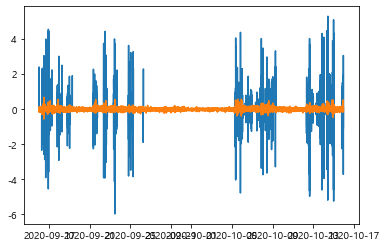

In [124]:
#c(month):더미화, -1:절편제거
result = sm.OLS.from_formula(formula='역률평균 ~ 전압고조파평균+전류평균+온도+선간전압평균+누적전력량+주파수+온도', data=X).fit() 
display(result.summary())

plt.plot(X.index, X.역률평균, X.index, result.fittedvalues)
plt.show()

In [113]:
# LinearRegression (using statsmodels)
fit_reg1 = sm.OLS(Y_train1, X_train1).fit() #회귀분석 계산
display(fit_reg1.summary()) #통계량 정리

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   역률평균   R-squared (uncentered):                   0.028
Model:                            OLS   Adj. R-squared (uncentered):              0.028
Method:                 Least Squares   F-statistic:                              206.3
Date:                Sat, 11 Sep 2021   Prob (F-statistic):                   1.91e-260
Time:                        18:35:26   Log-Likelihood:                         -12283.
No. Observations:               43129   AIC:                                  2.458e+04
Df Residuals:                   43123   BIC:                                  2.463e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
전류평균           0.0216      0.002     13.906      0.000       0.019       0.025
선간전압평균        -0.0620      0.002    -27.758      0.000      -0.066      -0.058
누적전력량         -0.0089      0.047     -0.190      0.849      -0.101       0.083
주파수            0.0234      0.001     17.528      0.000       0.021       0.026
온도            -0.0108      0.009     -1.156      0.248      -0.029       0.008
전압고조파평균        0.0014      0.005      0.266      0.790      -0.009       0.012
==============================================================================
Omnibus:                    15958.690   Durbin-Watson:                   1.483
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5769554.083
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                      59.656   Cond. No.                         35.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

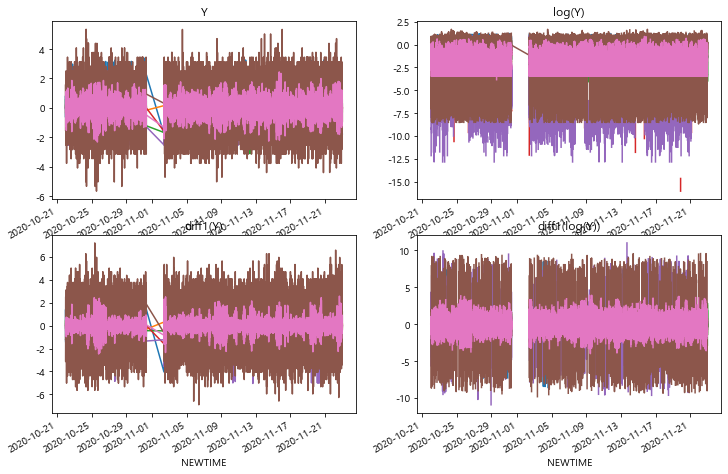

In [241]:
## 로그변환

## 정상성 확보
plt.figure(figsize=(12,8))
X_train_scaling.plot(ax=plt.subplot(221), title='Y', legend=False)
np.log(X_train_scaling).plot(ax=plt.subplot(222), title='log(Y)', legend=False)
X_train_scaling.diff(1).plot(ax=plt.subplot(223), title='diff1(Y)', legend=False)
np.log(X_train_scaling).diff(1).plot(ax=plt.subplot(224), title='diff1(log(Y))', legend=False)
plt.show()

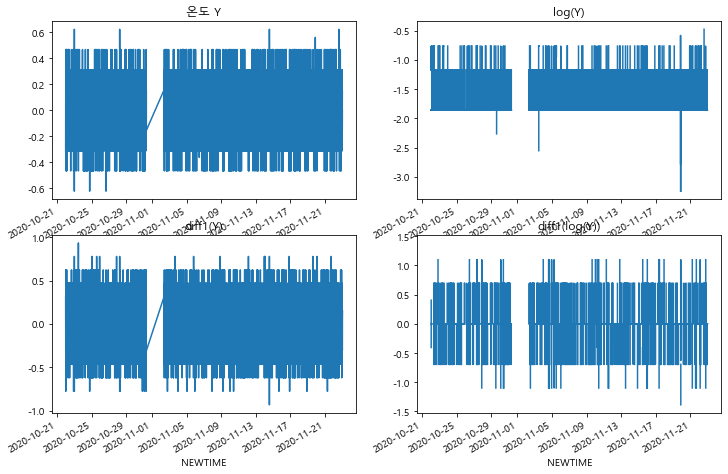

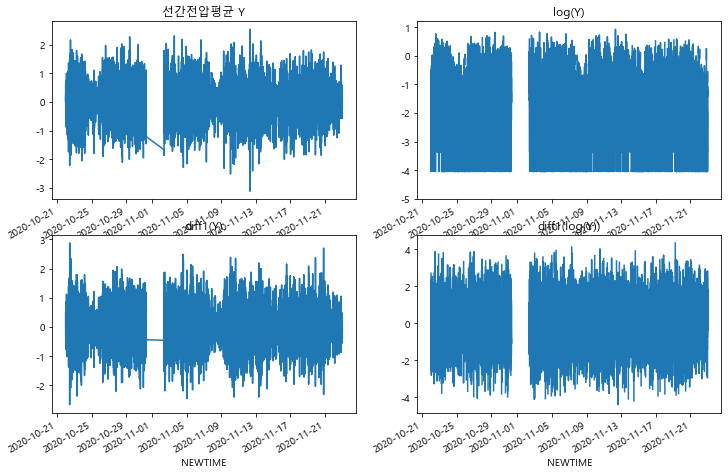

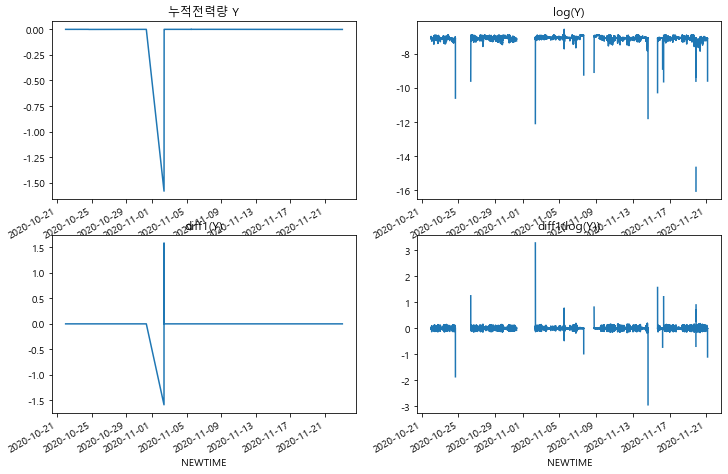

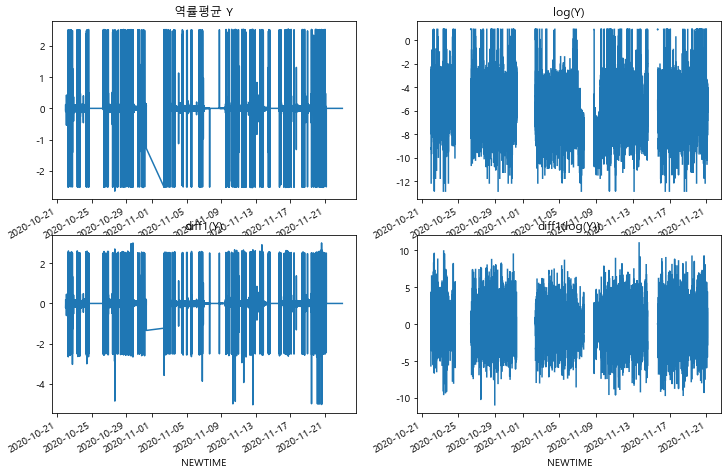

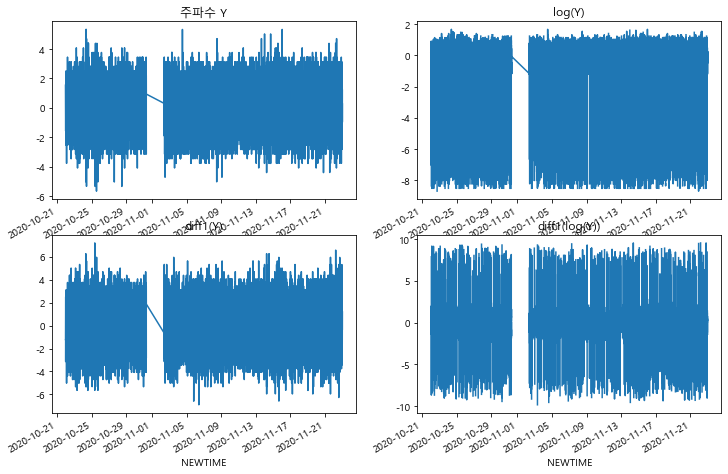

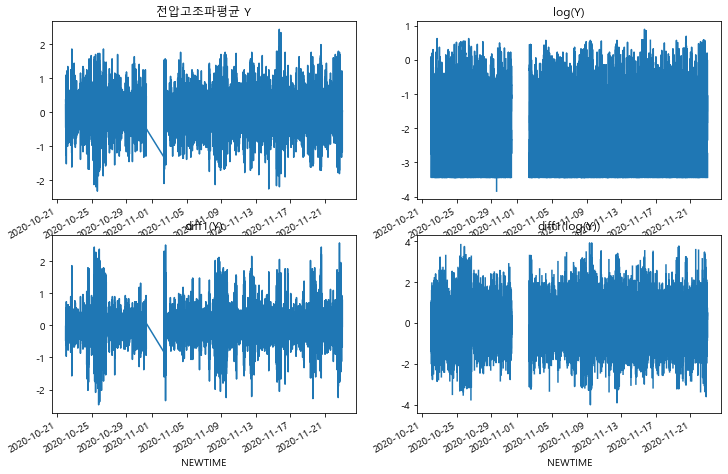

In [281]:
for raw in X_train.columns[1:]:
    plt.figure(figsize=(12,8))
    X_train[raw].plot(ax=plt.subplot(221), title='{} Y'.format(raw), legend=False)
    np.log(X_train[raw]).plot(ax=plt.subplot(222), title='log(Y)', legend=False)
    X_train[raw].diff(1).plot(ax=plt.subplot(223), title='diff1(Y)', legend=False)
    np.log(X_train[raw]).diff(1).plot(ax=plt.subplot(224), title='diff1(log(Y))', legend=False)
    plt.show()

# OLS Regression

#로그변했을 때  
#raw_log = np.log1p(X_train_scaling)
#test_log = np.log1p(X_test_scaling)

#데이터 분할(로그)  
Y_colname = ['전압고조파평균'] #예측할 att  
X_colname = ['온도', '전류평균', '역률평균']  

X_train = raw_log[['전류평균', '온도', '전압고조파평균']]  
X_test = test_log[['전류평균', '온도', '전압고조파평균']]  
Y_train = raw_log['역률평균']  
Y_test = test_log['역률평균']  

In [100]:
### 차분 안했을 때 (표준화만)
X_train = X_train_scaling[['전류평균', '선간전압평균', '누적전력량', '주파수', '누적전력량','전압고조파평균']]
X_test = X_test_scaling[['전류평균', '선간전압평균', '누적전력량', '주파수', '누적전력량','전압고조파평균']]
Y_train = X_train_scaling['역률평균']
Y_test = X_test_scaling['역률평균']

차분 적용했을 때  
X_train_diff=X_train_scaling.diff(1)[1:]
X_test_diff=X_test_scaling.diff(1)[1:]

X_train = X_train_diff[['전류평균', '선간전압평균', '누적전력량', '주파수', '누적전력량','전압고조파평균']]
X_test = X_test_diff[['전류평균', '선간전압평균', '누적전력량', '주파수', '누적전력량','전압고조파평균']]
Y_train = X_train_diff['역률평균']
Y_test = X_test_diff['역률평균']

In [101]:
# LinearRegression (using statsmodels)
fit_reg1 = sm.OLS(Y_train, X_train).fit() #회귀분석 계산
display(fit_reg1.summary()) #통계량 정리

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   역률평균   R-squared (uncentered):                   0.822
Model:                            OLS   Adj. R-squared (uncentered):              0.822
Method:                 Least Squares   F-statistic:                          3.984e+04
Date:                Fri, 10 Sep 2021   Prob (F-statistic):                        0.00
Time:                        15:27:39   Log-Likelihood:                         -23980.
No. Observations:               43135   AIC:                                  4.797e+04
Df Residuals:                   43130   BIC:                                  4.801e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
전류평균           0.8129      0.003    312.723      0.000       0.808       0.818
선간전압평균        -0.1116      0.003    -42.131      0.000      -0.117      -0.106
누적전력량         -0.0072      0.001     -6.936      0.000      -0.009      -0.005
주파수            0.0429      0.002     20.494      0.000       0.039       0.047
누적전력량         -0.0072      0.001     -6.936      0.000      -0.009      -0.005
전압고조파평균        0.0934      0.002     42.371      0.000       0.089       0.098
==============================================================================
Omnibus:                     4161.380   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16103.048
Skew:                           0.436   Prob(JB):                         0.00
Kurtosis:                       5.863   Cond. No.                     3.19e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 9.64e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [125]:
# 예측값
pred_tr_reg1 = fit_reg1.predict(X_train1).values
pred_te_reg1 = fit_reg1.predict(X_test1).values

In [126]:
def evaluation(Y_real, Y_pred, graph_on=False):
    loss_length = len(Y_real.values.flatten()) - len(Y_pred)
    if loss_length != 0:
        Y_real = Y_real[loss_length:]
    if graph_on == True:
        pd.concat([Y_real, pd.DataFrame(Y_pred, index=Y_real.index, columns=['prediction'])], axis=1).plot(kind='line', figsize=(20,6),
                                                                                                           xlim=(Y_real.index.min(),Y_real.index.max()),
                                                                                                           linewidth=3, fontsize=20)
        plt.title('Time Series of Target', fontsize=20)
        plt.xlabel('Index', fontsize=15)
        plt.ylabel('Target Value', fontsize=15)
    MAE = abs(Y_real.values.flatten() - Y_pred).mean()
    MSE = ((Y_real.values.flatten() - Y_pred)**2).mean()
    MAPE = (abs(Y_real.values.flatten() - Y_pred)/Y_real.values.flatten()*100).mean()
    Score = pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T
    Residual = pd.DataFrame(Y_real.values.flatten() - Y_pred, index=Y_real.index, columns=['Error'])
    return Score, Residual

In [127]:
def evaluation_trte(Y_real_tr, Y_pred_tr, Y_real_te, Y_pred_te, graph_on=False):
    Score_tr, Residual_tr = evaluation(Y_real_tr, Y_pred_tr, graph_on=graph_on)
    Score_te, Residual_te = evaluation(Y_real_te, Y_pred_te, graph_on=graph_on)
    Score_trte = pd.concat([Score_tr, Score_te], axis=0)
    Score_trte.index = ['Train', 'Test']
    return Score_trte, Residual_tr, Residual_te

            MAE       MSE  MAPE
Train  0.111181  0.103492   inf
Test   0.171778  0.194766   inf
                        Error
NEWTIME                      
2020-09-16 00:06:00 -0.001197
2020-09-16 00:07:00 -0.041263
2020-09-16 00:08:00 -0.001837
2020-09-16 00:09:00 -0.045218
2020-09-16 00:10:00  0.013471
...                       ...
2020-10-15 22:50:00  0.763590
2020-10-15 22:51:00 -1.839900
2020-10-15 22:52:00 -0.086314
2020-10-15 22:53:00 -0.524759
2020-10-15 22:54:00 -1.146041

[43129 rows x 1 columns]
                        Error
NEWTIME                      
2020-10-15 23:01:00  0.380449
2020-10-15 23:02:00  0.429276
2020-10-15 23:03:00  0.049204
2020-10-15 23:04:00  0.748928
2020-10-15 23:05:00  0.974936
...                       ...
2020-10-27 23:55:19  0.581613
2020-10-27 23:56:19  0.776987
2020-10-27 23:57:19  0.717482
2020-10-27 23:58:19 -0.020711
2020-10-27 23:59:19 -0.091866

[17339 rows x 1 columns]


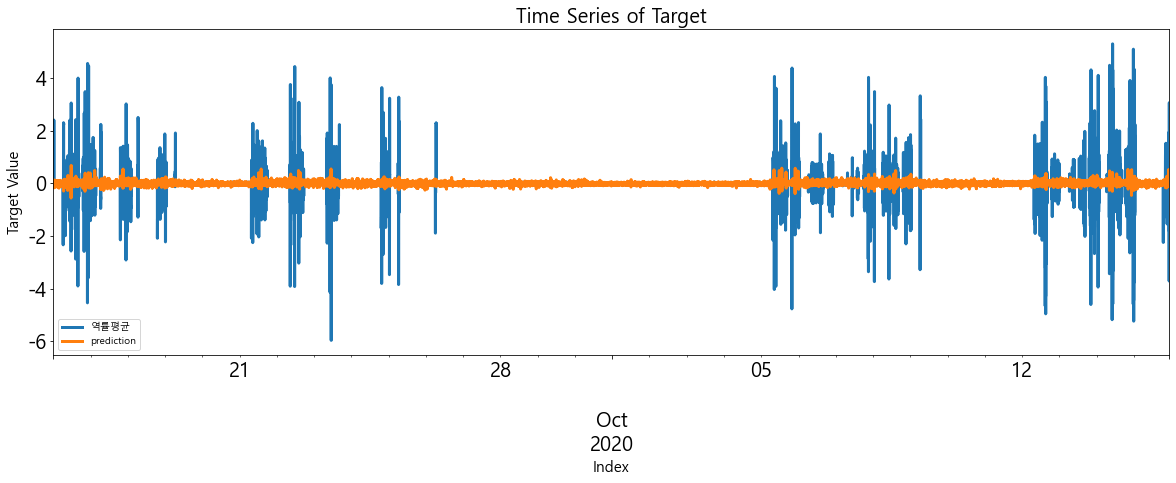

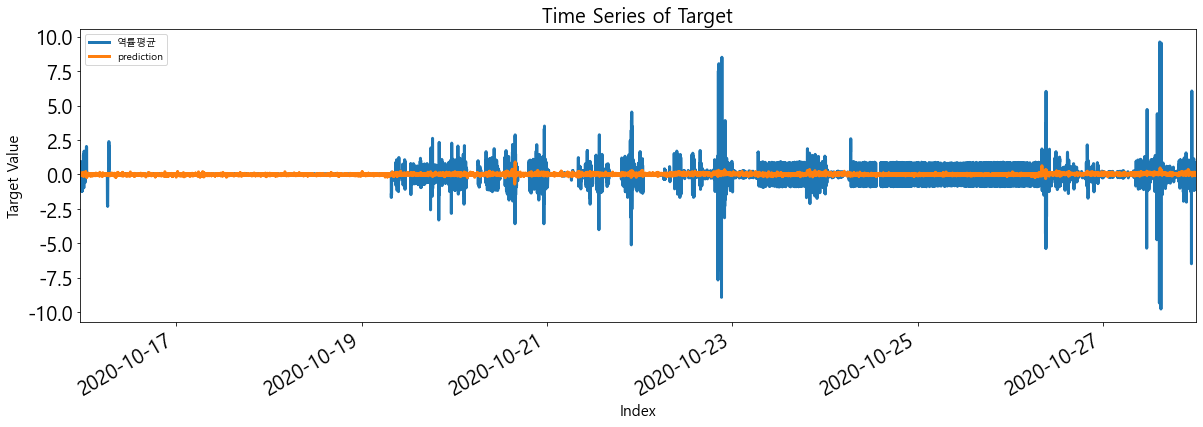

In [128]:
# 예측값 평가
Score_reg1, Resid_tr_reg1, Resid_te_reg1 = evaluation_trte(Y_train1, pred_tr_reg1, Y_test1, pred_te_reg1, graph_on=True)
print(Score_reg1)
print(Resid_tr_reg1)
print(Resid_te_reg1)

# 잔차분석

# LSTM 적용(차분된 데이터로)

In [148]:
comp_1_one=pd.concat([X_train,X_test],axis=0)
comp_1_one

,전류평균,온도,선간전압평균,누적전력량,역률평균,주파수,전압고조파평균
NEWTIME,,,,,,,
2020-09-16 00:06:00,1.044311,-0.164955,-0.197013,0.000566,0.013914,-0.910480,-0.095401
2020-09-16 00:07:00,1.040028,0.000000,0.262421,0.000566,-0.020871,0.617825,-0.143835
2020-09-16 00:08:00,1.050635,0.000000,0.788051,0.000566,-0.006957,0.910480,-0.119618
2020-09-16 00:09:00,1.058999,0.000000,1.115880,0.000566,-0.027828,2.731439,-0.047700
2020-09-16 00:10:00,1.061243,0.000000,0.919655,0.000566,-0.020871,0.000000,-0.119618
...,...,...,...,...,...,...,...
2020-10-27 23:55:19,2.782362,0.164955,-0.394025,0.001153,0.650011,-0.606314,-0.071665
2020-10-27 23:56:19,2.935354,0.164955,-0.065667,0.001188,0.856777,0.605696,0.023888
2020-10-27 23:57:19,2.746239,0.164955,0.000000,0.001258,0.774543,-0.000845,-0.262773


In [149]:
comp_1_one = comp_1_one.values

In [150]:
comp_1_one[:,4]

array([ 1.39142441e-02, -2.08713661e-02, -6.95712204e-03, ...,
        7.74543354e-01, -7.16583570e-04, -1.18159761e-01])

In [151]:
def multivariate_data(dataset, target, start_index, end_index, history_size, target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i:i + target_size])
    return np.array(data), np.array(labels)

In [153]:
TRAIN_SPLIT=43129

In [154]:
past_history = 720
future_target = 72
STEP = 6 

x_train_single, y_train_single = multivariate_data(comp_1_one, comp_1_one[:, 4], 0, TRAIN_SPLIT, past_history,
                                                   future_target, STEP, single_step=True)
x_val_single, y_val_single = multivariate_data(comp_1_one, comp_1_one[:, 4], TRAIN_SPLIT, None, past_history,
                                               future_target, STEP, single_step=True)

print('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (120, 7)


In [155]:
BUFFER_SIZE = 100
BATCH_SIZE = 500
EPOCHS = 100
EVALUATION_INTERVAL = 10

In [164]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32, input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dropout(0.3)) ##과대적합 방지##
single_step_model.add(tf.keras.layers.Dense(1))
single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mean_squared_error',metrics=['mae'])

for x, y in val_data_single.take(1):
    print(single_step_model.predict(x).shape)

(500, 1)


In [166]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Epoch 1/100
10/10 [==============================] - 6s 673ms/step - loss: 0.1395 - mae: 0.1492 - val_loss: 0.1825 - val_mae: 0.1610
Epoch 2/100
10/10 [==============================] - 7s 702ms/step - loss: 0.1167 - mae: 0.1300 - val_loss: 0.1823 - val_mae: 0.1601
Epoch 3/100
10/10 [==============================] - 7s 710ms/step - loss: 0.0738 - mae: 0.0838 - val_loss: 0.1823 - val_mae: 0.1602
Epoch 4/100
10/10 [==============================] - 7s 713ms/step - loss: 0.0012 - mae: 0.0271 - val_loss: 0.1823 - val_mae: 0.1596
Epoch 5/100
10/10 [==============================] - 7s 713ms/step - loss: 7.8361e-04 - mae: 0.0218 - val_loss: 0.1823 - val_mae: 0.1594
Epoch 6/100
10/10 [==============================] - 7s 736ms/step - loss: 0.0937 - mae: 0.1142 - val_loss: 0.1825 - val_mae: 0.1640
Epoch 7/100
10/10 [==============================] - 7s 732ms/step - loss: 0.0913 - mae: 0.1075 - val_loss: 0.1823 - val_mae: 0.1591
Epoch 8/100
10/10 [==============================] - 6s 671ms/ste

Epoch 62/100
10/10 [==============================] - 6s 620ms/step - loss: 0.1303 - mae: 0.1220 - val_loss: 0.1822 - val_mae: 0.1589
Epoch 63/100
10/10 [==============================] - 6s 620ms/step - loss: 0.0204 - mae: 0.0272 - val_loss: 0.1822 - val_mae: 0.1586
Epoch 64/100
10/10 [==============================] - 6s 628ms/step - loss: 3.3220e-04 - mae: 0.0140 - val_loss: 0.1822 - val_mae: 0.1585
Epoch 65/100
10/10 [==============================] - 7s 729ms/step - loss: 0.0423 - mae: 0.0511 - val_loss: 0.1822 - val_mae: 0.1578
Epoch 66/100
10/10 [==============================] - 7s 711ms/step - loss: 0.1272 - mae: 0.1439 - val_loss: 0.1822 - val_mae: 0.1580
Epoch 67/100
10/10 [==============================] - 6s 633ms/step - loss: 0.0656 - mae: 0.0636 - val_loss: 0.1822 - val_mae: 0.1587
Epoch 68/100
10/10 [==============================] - 6s 657ms/step - loss: 0.3250 - mae: 0.2399 - val_loss: 0.1822 - val_mae: 0.1589
Epoch 69/100
10/10 [==============================] - 7s 7

In [167]:
scores=single_step_model.evaluate(x_val_single, y_val_single,batch_size=1000)

17/17 [==============================] - 3s 147ms/step - loss: 0.2031 - mae: 0.1649


In [168]:
scores

[0.20306584239006042, 0.1648532748222351]

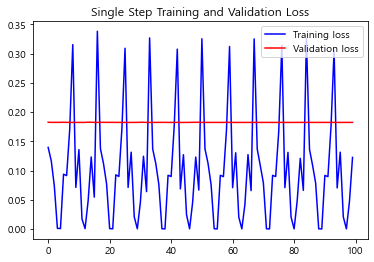

In [169]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

plot_train_history(single_step_history,
                   'Single Step Training and Validation Loss')

In [170]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.axis('auto')
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

In [171]:
def create_time_steps(length):
    return list(range(-length, 0))

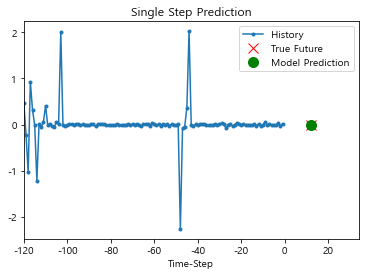

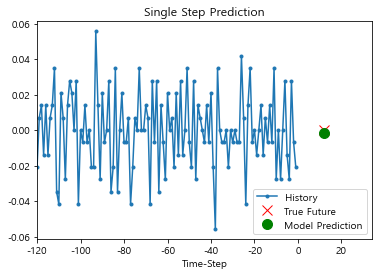

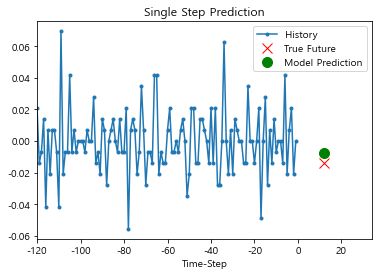

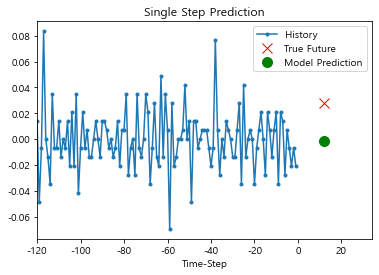

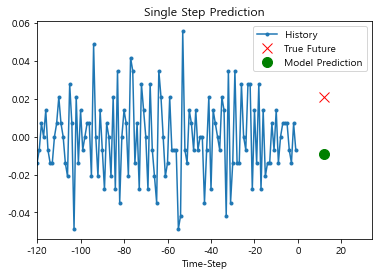

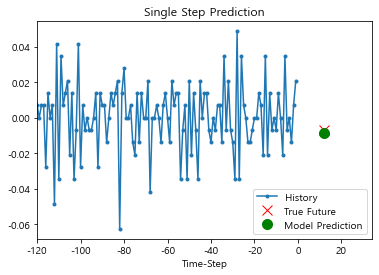

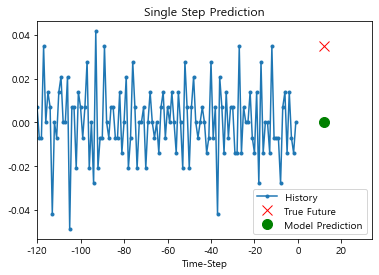

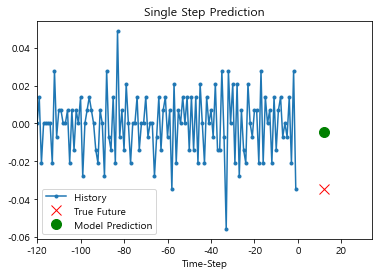

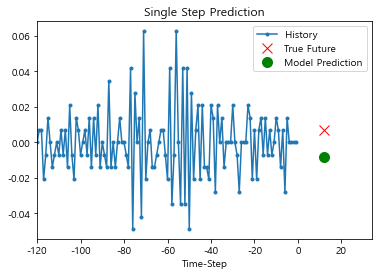

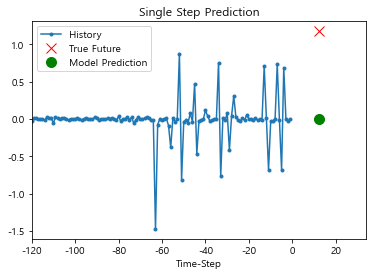

In [172]:
for x, y in val_data_single.take(10):
    plot = show_plot([x[0][:,4].numpy(), y[0].numpy(), 
                      single_step_model.predict(x)[0]], 12,
                     'Single Step Prediction') 
    plot.show()

In [ ]:
## multi step

In [173]:
past_history = 720 # 60분 * 24시간 * 2일
future_target = 72 # 60분*3 -> 1시간 기준으로 3시간후
STEP = 6 #1분 -> 1시간이니까

x_train_multi, y_train_multi = multivariate_data(comp_1_one, comp_1_one[:, 4], 0, TRAIN_SPLIT, past_history,
                                                   future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(comp_1_one, comp_1_one[:, 4], TRAIN_SPLIT, None, past_history,
                                               future_target, STEP)

print('Single window of past history : {}'.format(x_train_multi[0].shape))
print('\n Target 역률평균 to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (120, 7)

 Target 역률평균 to predict : (72,)


In [174]:
BUFFER_SIZE = 1000
BATCH_SIZE = 1000 #전체 데이터를 몇 개의 그룹으로 나눠서 학습할때 나누는 그 크기 (최대한 키우기)
EPOCHS = 100 #학습 반복 횟수 (Validation set에서 epoch 늘릴수록 에러 감소하다가 어느 지점에서 다시 증가 -> 최소)
EVALUATION_INTERVAL = 10

In [175]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [176]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32, return_sequences=True,input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(72))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mean_squared_error',metrics=['mae'])

In [177]:
for x, y in val_data_multi.take(1):
    print(multi_step_model.predict(x).shape)

(1000, 72)


In [178]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_multi,
                                            validation_steps=50)

Epoch 1/100
10/10 [==============================] - 23s 2s/step - loss: 0.1229 - mae: 0.1270 - val_loss: 0.1945 - val_mae: 0.1625
Epoch 2/100
10/10 [==============================] - 23s 2s/step - loss: 0.0406 - mae: 0.0436 - val_loss: 0.1945 - val_mae: 0.1622
Epoch 3/100
10/10 [==============================] - 26s 3s/step - loss: 0.0470 - mae: 0.0575 - val_loss: 0.1943 - val_mae: 0.1616
Epoch 4/100
10/10 [==============================] - 26s 3s/step - loss: 0.1433 - mae: 0.1282 - val_loss: 0.1943 - val_mae: 0.1613
Epoch 5/100
10/10 [==============================] - 25s 3s/step - loss: 0.1760 - mae: 0.1494 - val_loss: 0.1943 - val_mae: 0.1613
Epoch 6/100
10/10 [==============================] - 26s 3s/step - loss: 0.0826 - mae: 0.0804 - val_loss: 0.1943 - val_mae: 0.1612
Epoch 7/100
10/10 [==============================] - 26s 3s/step - loss: 0.0147 - mae: 0.0236 - val_loss: 0.1943 - val_mae: 0.1615
Epoch 8/100
10/10 [==============================] - 26s 3s/step - loss: 0.0931 - m

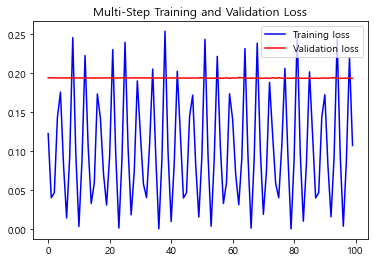

In [179]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

plot_train_history(multi_step_history,
                   'Multi-Step Training and Validation Loss')

In [185]:
def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(12,6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)
    
    plt.plot(num_in, np.array(history[:,4]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future),'b-',label='True Future')
    
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP,np.array(prediction),'r-',label='Predicted Future')
    
    plt.legend(loc='upper left')
    #plt.ylim([-0.81,-0.79])
    plt.xlim([-15,15])
    #plt.ylim([-0.9,-0.5])
    plt.show()

In [186]:
def create_time_steps(length):
    return list(range(-length,0))

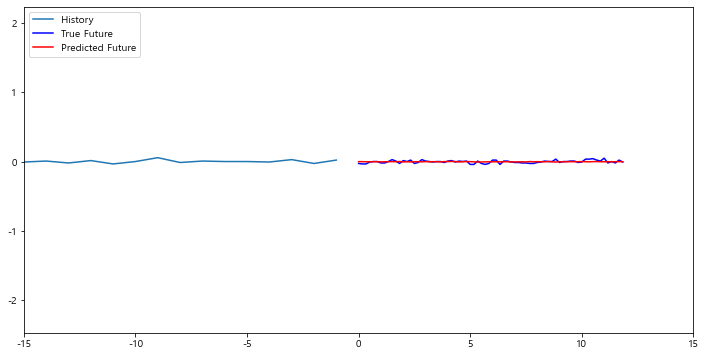

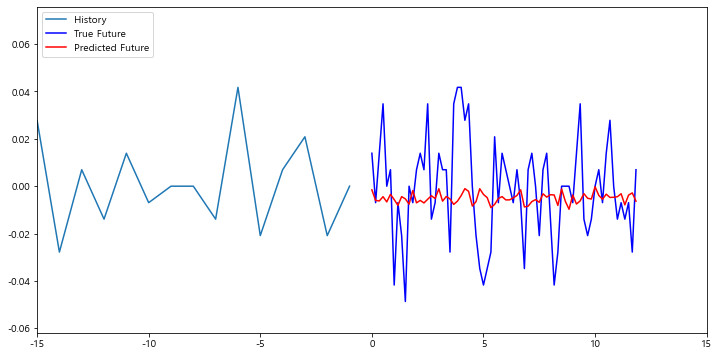

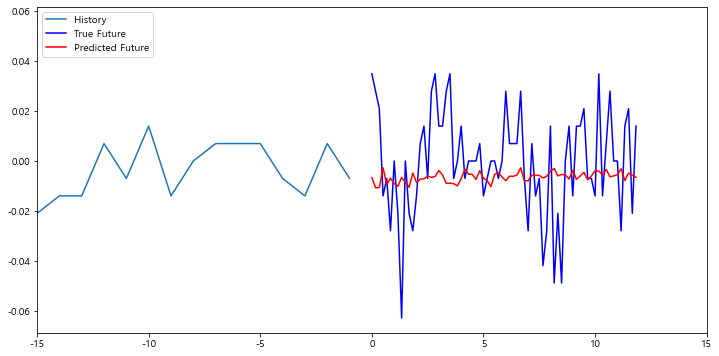

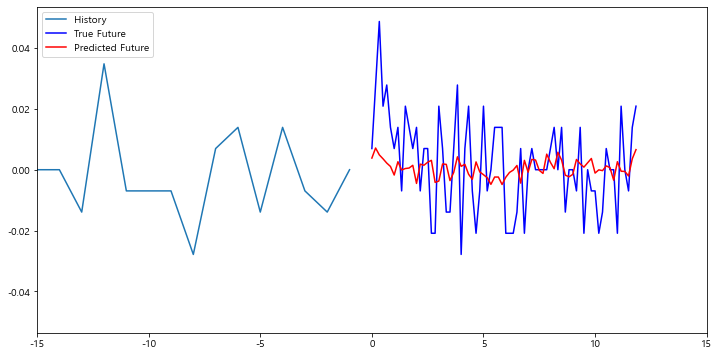

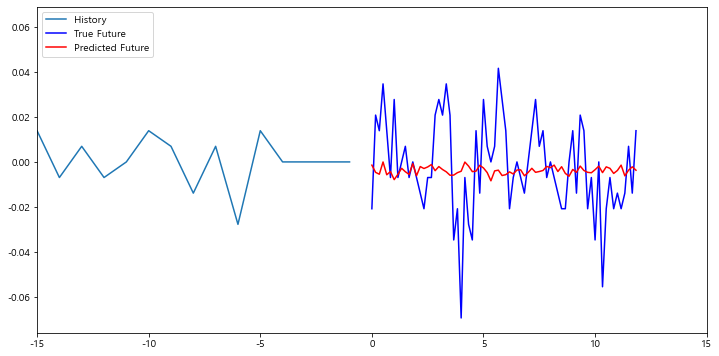

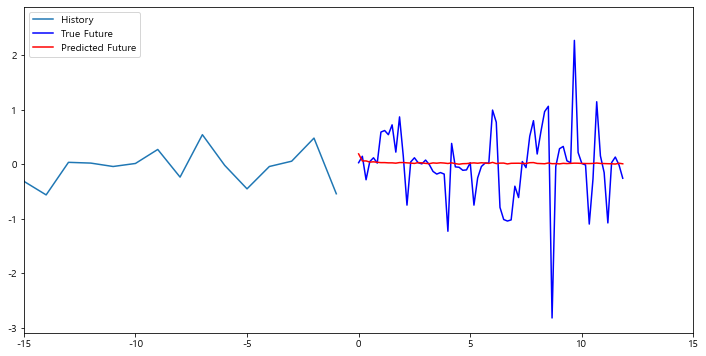

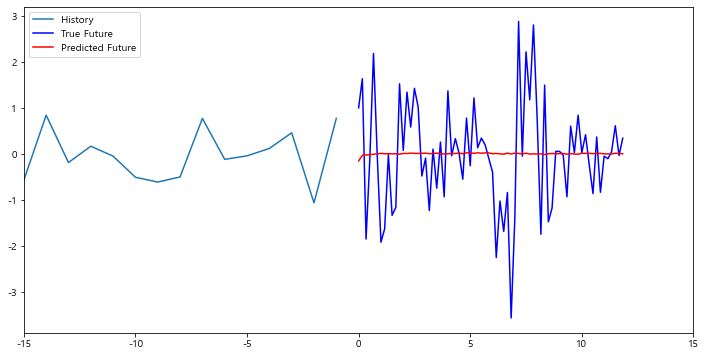

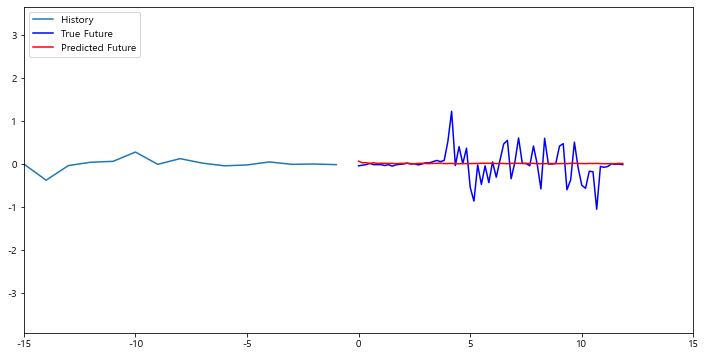

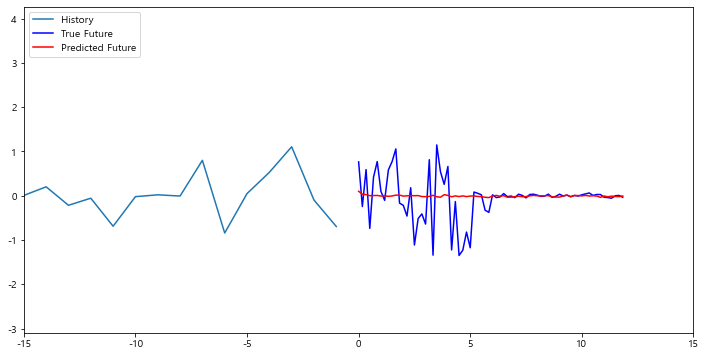

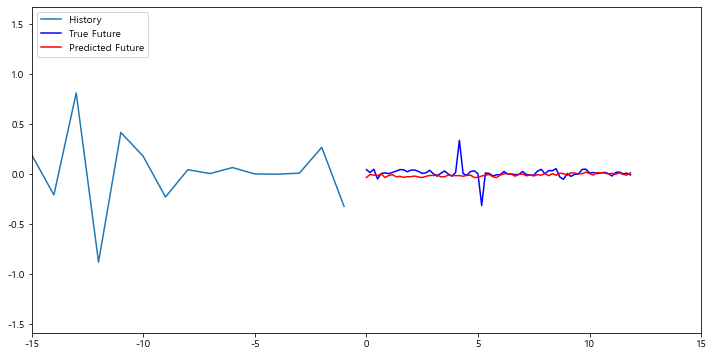

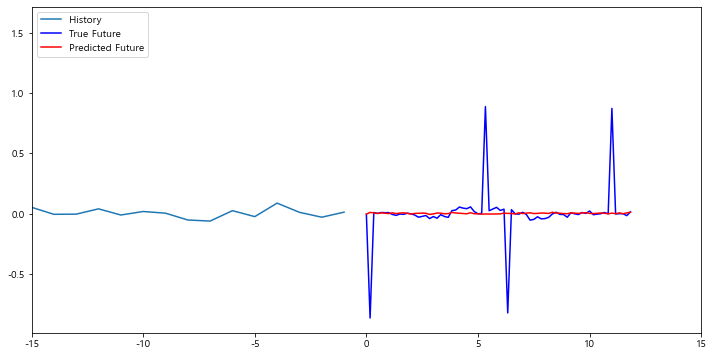

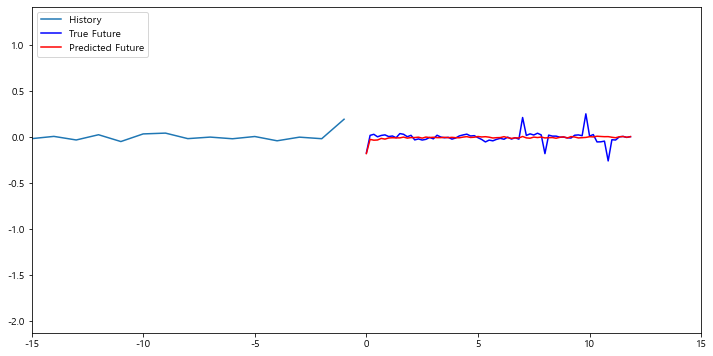

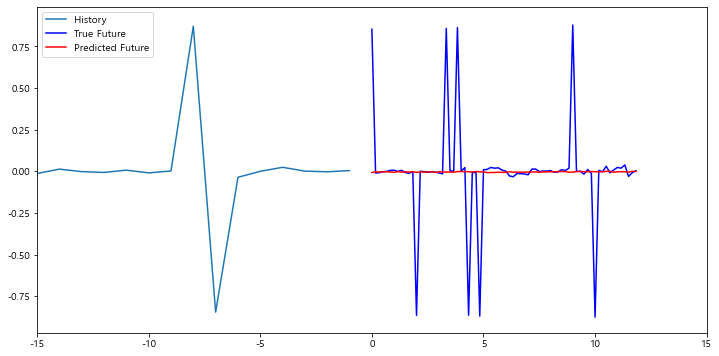

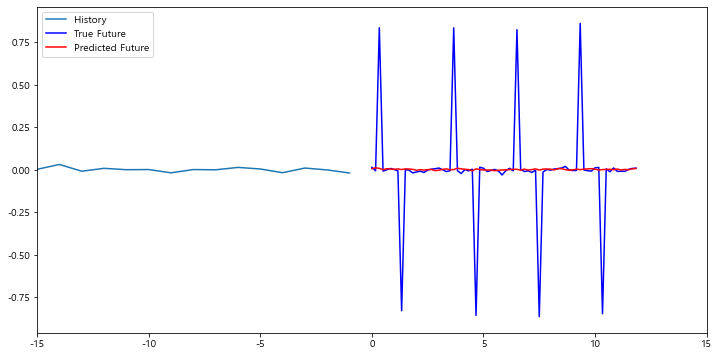

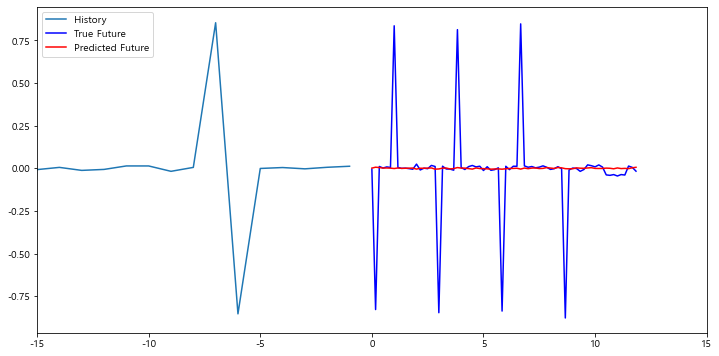

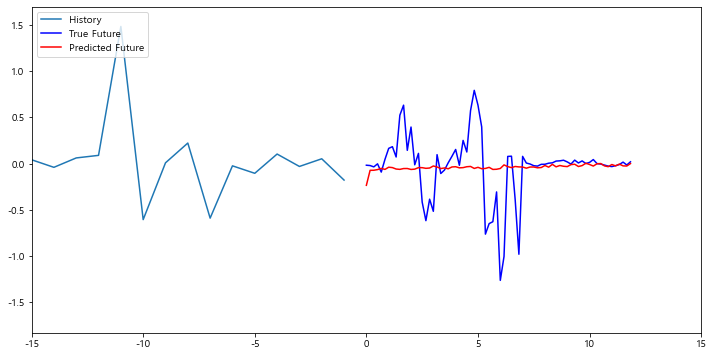

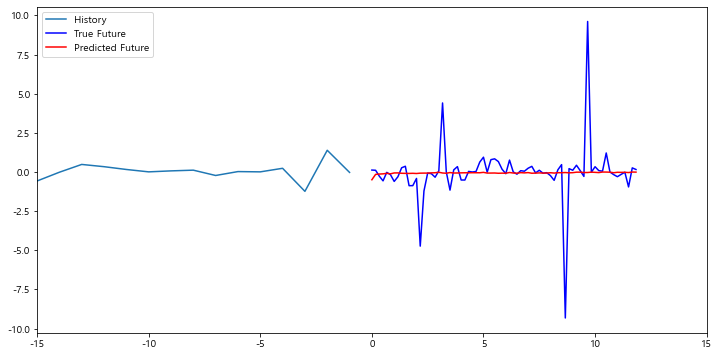

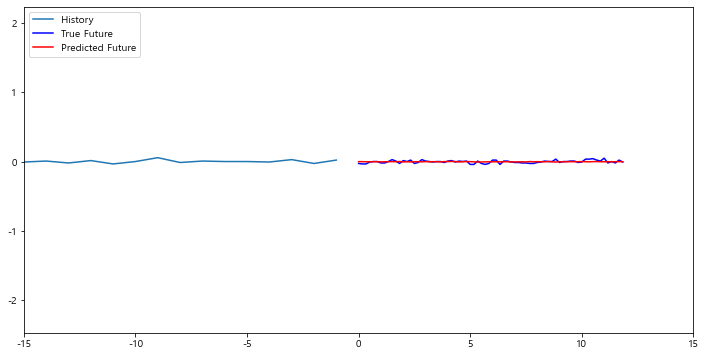

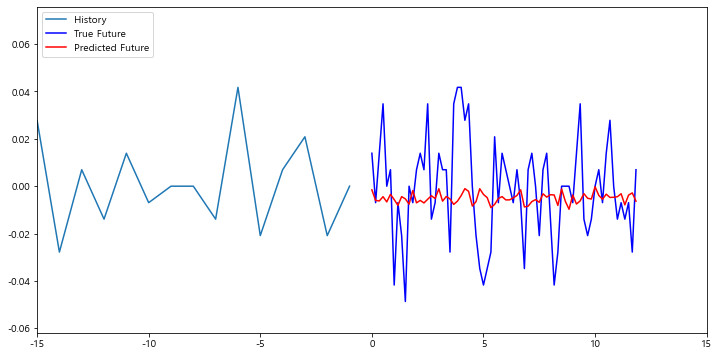

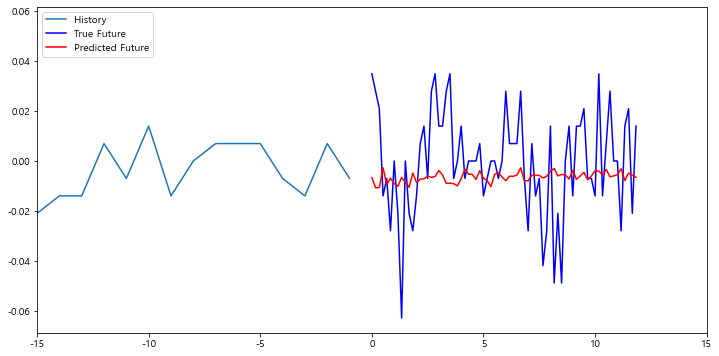

In [187]:
for x, y in val_data_multi.take(20):
    multi_step_plot(x[0],y[0],multi_step_model.predict(x)[0])

In [183]:
scores=multi_step_model.evaluate(x_val_multi, y_val_multi,batch_size=1000)

17/17 [==============================] - 6s 318ms/step - loss: 0.2015 - mae: 0.1654


In [184]:
scores

[0.20152227580547333, 0.16538943350315094]

# ARIMA

In [18]:
comp_1_one=pd.concat([X_train,X_test],axis=0)

train = comp_1_one[:43129]

In [19]:
train

,전류평균,온도,선간전압평균,누적전력량,역률평균,주파수,전압고조파평균
NEWTIME,,,,,,,
2020-09-16 00:06:00,1.044311,-0.164955,-0.197013,0.000566,0.013914,-0.910480,-0.095401
2020-09-16 00:07:00,1.040028,0.000000,0.262421,0.000566,-0.020871,0.617825,-0.143835
2020-09-16 00:08:00,1.050635,0.000000,0.788051,0.000566,-0.006957,0.910480,-0.119618
2020-09-16 00:09:00,1.058999,0.000000,1.115880,0.000566,-0.027828,2.731439,-0.047700
2020-09-16 00:10:00,1.061243,0.000000,0.919655,0.000566,-0.020871,0.000000,-0.119618
...,...,...,...,...,...,...,...
2020-10-15 22:50:00,1.943085,0.000000,-0.722643,0.000847,0.841812,-0.325171,-0.668541
2020-10-15 22:51:00,6.090786,0.000000,1.707706,0.000884,-1.829723,-0.617825,-0.573140
2020-10-15 22:52:00,0.804013,0.000000,-0.788051,0.000827,-0.006957,0.585308,-0.406555


In [20]:
## auto.arima(data)를 입력하면 가장 적절한 arima모델을 추천
# auto_arima함수를 사용하여 

from pmdarima.arima import auto_arima

model=auto_arima(train['역률평균'],trace=True, error_action='ignore', 
                 start_p=1,start_q=1,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)

## 튜닝해보기!!! AIC(통계모델 성능을 측정하는 기준)이 낮을 수록 좋은 모델

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=25789.206, Time=1.76 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=23830.390, Time=1.72 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=22511.421, Time=2.87 sec


KeyboardInterrupt: 

In [ ]:
model.summary()

In [ ]:
comp_1_one.iloc[43129:]

In [ ]:
comp_1_one.iloc[:, 4]

In [21]:
## ARIMA 모델링
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

model = ARIMA(comp_1_one.iloc[:, 4], order = (1, 0, 2))
model_fit = model.fit(disp = 0)
#disp : 수렴 정보를 나타냄 - True이면 수렴, <0은 출력없음

start_index = datetime(2020, 10, 15, 23, 1, 0)
end_index = datetime(2020, 10, 27, 23, 59, 19)
forecast = model_fit.predict(start = start_index, end = end_index, typ = 'levels')

<ipython-input-21-53b88aa0c94b>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnin

MemoryError: Unable to allocate 27.2 GiB for an array with shape (60408, 60408) and data type float64

In [ ]:
#시각화
plt.figure(figsize=(22,8))
plt.plot(comp_1_one.index[:], comp_1_one.iloc[:,4],label='original')
plt.plot(forecast,label='predicted')
plt.title('Time Seires Forcast')
plt.xlabel('Time')
plt.ylabel('전압고조파평균')
plt.legend()
plt.show()